# READING CSV FILE

 IMPORTING CSV FILE AND READING HEADS 

In [77]:
#importing pandas using alias pd
import pandas as pd
file = "un-general-debates-blueprint.csv"
df = pd.read_csv(file)# importing csv file
df.head(20)


,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


# GETTING STOPWORDS

 IMPORTING NLTK PACKAGE AND GETTING STOPWORDS

In [57]:
import nltk # importing nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))# english stop words
print(stopwords)


{'out', 't', 'won', 'wouldn', 'or', 've', 'all', 'than', 'after', 'd', 'he', 'does', 'just', 'myself', 'above', "you'd", 'at', 'once', 'i', 'being', 'more', 'her', 'not', 'couldn', 'each', "you're", "couldn't", 'me', 'theirs', "mustn't", 'been', 'ma', 'she', 'ours', 'before', "shouldn't", "hadn't", 'my', 'most', 're', "doesn't", "needn't", 'themselves', "aren't", 'should', 'were', 'are', 'very', "hasn't", 'down', 'did', 'didn', 'against', 'ain', 'why', 'their', 's', 'do', 'shan', "haven't", 'nor', 'you', 'herself', 'when', 'those', 'then', 'off', 'can', 'weren', 'other', 'this', 'shouldn', "she's", 'about', "don't", 'don', 'now', 'which', 'own', 'wasn', 'your', 'whom', 'for', 'who', 'them', 'no', 'what', 'up', 'between', 'hers', 'because', "it's", 'how', 'am', 'has', 'doing', 'with', 'its', "should've", 'from', 'is', 'm', 'the', 'and', 'same', "wasn't", "isn't", 'only', 'doesn', 'they', 'these', 'further', 'having', 'ourselves', 'a', "wouldn't", 'to', "weren't", 'we', "that'll", 'into'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laxmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# PREPROCESSING PIPELINE

IMPORTING REGEX AND TOKENISING THE WORDS FROM CSV FILE,REMOVING STOP WORDS AND ADDING THEM TO PIPELINES

In [58]:
import regex as re
# Define a function to tokenize text using regular expressions
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]
# Define a list of functions to be applied sequentially to prepare text data
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)



# COUNTING TOKENS

USING COUNTER TO COUNT THE WORD FREQUENCY AND SORT THEM ACCOUNTING TO FREQUENCY

In [59]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])# Convert the counter to a DataFrame with 
#token frequencies, filtering out tokens with frequency less than 1
freq_df = freq_df.query('freq >= 1')
freq_df.index.name ='token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)


,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


# WORDCLOUD

WE ARE FORMING A WORD CLOUD WITH THE WORDS FROM OUR DATASET

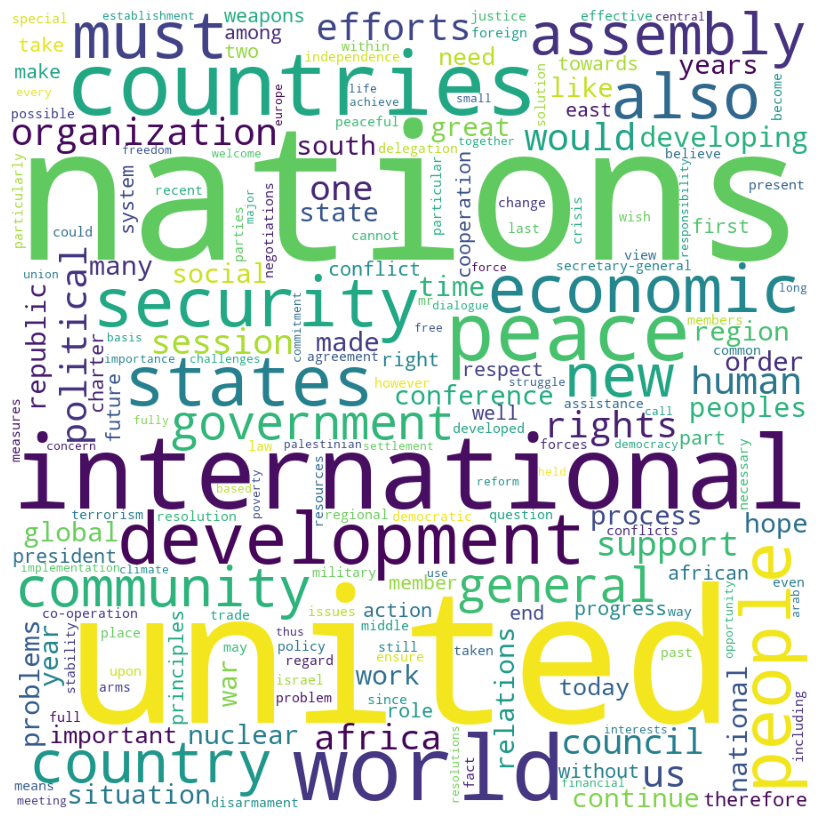

In [60]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 900, height=900, margin=2)
# Generate the word cloud using token frequencies from freq_df
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc) # Display the word cloud
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


# TFIDF

TERM FREQUENCY-INVERSE DOCUMENT FREQUENCY (ALSO CALLED TFIDF), IS A WELL KNOWN METHOD TO EVALUATE HOW IMPORTANT ISA WORD IN DOCUMENT.  TFIDF COMES UP A LOT IN RESEARCH WORK BECAUSE ITS BOTH CORPUS EXPLORATION METHOD AND A PRE-PROCESSING METHOD FOR MANY OTHER TEXT-MINIG MEASURES AND METHODS. 

In [61]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)


# TFIDF=TF*IDF

In [62]:
# Calculate TF-IDF (Term Frequency - Inverse Document Frequency) by multiplying token frequency (freq) with IDF (Inverse Document Frequency)
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']

# Display the first few rows of the DataFrame with the new TF-IDF column
freq_df.head()


,freq,tfidf
token,,
nations,124508,12649.986284
united,120763,12285.608632
international,117223,12364.276226
world,89421,9503.708982
countries,85734,10888.485986


# WORDCLOUD

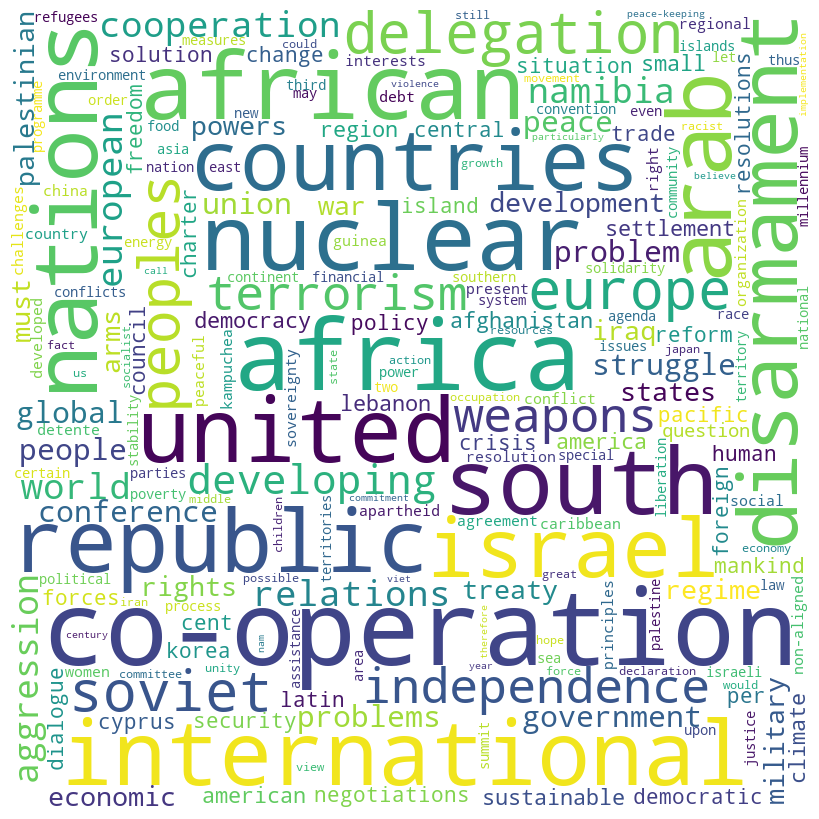

In [63]:
# Create a WordCloud object with specified parameters
wc = WordCloud(background_color='white', width = 800, height=800, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )# Generate the word cloud using TF-IDF
#values from freq_df
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


# YEAR 1970

FILTERING ACCORDING TO YEAR

In [64]:
#importing pandas 
import pandas as pd
file = "un-general-debates-blueprint.csv"
df = pd.read_csv(file)
df= df[df['year']==1970]
# Filter the DataFrame to include only
#rows where the 'year' column is equal to 1970
df.head(20)


,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


# STOPWORDS

 IMPORTING NLTK PACKAGE AND GETTING STOPWORDS

In [65]:
#importing nltk package
import nltk 
nltk.download('stopwords')# Download the stopwords corpus for the English language
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)


{'out', 't', 'won', 'wouldn', 'or', 've', 'all', 'than', 'after', 'd', 'he', 'does', 'just', 'myself', 'above', "you'd", 'at', 'once', 'i', 'being', 'more', 'her', 'not', 'couldn', 'each', "you're", "couldn't", 'me', 'theirs', "mustn't", 'been', 'ma', 'she', 'ours', 'before', "shouldn't", "hadn't", 'my', 'most', 're', "doesn't", "needn't", 'themselves', "aren't", 'should', 'were', 'are', 'very', "hasn't", 'down', 'did', 'didn', 'against', 'ain', 'why', 'their', 's', 'do', 'shan', "haven't", 'nor', 'you', 'herself', 'when', 'those', 'then', 'off', 'can', 'weren', 'other', 'this', 'shouldn', "she's", 'about', "don't", 'don', 'now', 'which', 'own', 'wasn', 'your', 'whom', 'for', 'who', 'them', 'no', 'what', 'up', 'between', 'hers', 'because', "it's", 'how', 'am', 'has', 'doing', 'with', 'its', "should've", 'from', 'is', 'm', 'the', 'and', 'same', "wasn't", "isn't", 'only', 'doesn', 'they', 'these', 'further', 'having', 'ourselves', 'a', "wouldn't", 'to', "weren't", 'we', "that'll", 'into'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laxmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# TOKENIZATION

IMPORTING REGEX AND TOKENISING THE WORDS FROM CSV FILE,REMOVING STOP WORDS AND ADDING THEM TO PIPELINES

In [66]:
#imporing regex module
import regex as re
# Define a function to tokenize text using regular expressions
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]
# Define a function to prepare text data by applying
#a sequence of functions defined in the pipeline
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)



# KEYWORD COUNTING

USING COUNTER TO COUNT THE WORD FREQUENCY AND SORT THEM ACCOUNTING TO FREQUENCY

In [67]:
#creating new column 
df['num_tokens'] = df['tokens'].map(len)

def count_keywords(tokens, keywords): 
 # Filter tokens to only include those that are present in the list of keywords
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]




# COUNTING TOKENS

USING COUNTER TO COUNT THE WORD FREQUENCY AND SORT THEM ACCOUNTING TO FREQUENCY

In [68]:
#import counter from collections module
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])# Convert the counter to a DataFrame with 
#token frequencies, filtering out tokens with frequency less than 1
freq_df = freq_df.query('freq >= 1')
freq_df.index.name ='token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)


,freq
token,
nations,1997
united,1996
international,1251
world,1093
peace,970
countries,908
states,896
organization,762
would,677


# WORDCLOUD

USING COUNTER TO COUNT THE WORD FREQUENCY AND SORT THEM ACCOUNTING TO FREQUENCY

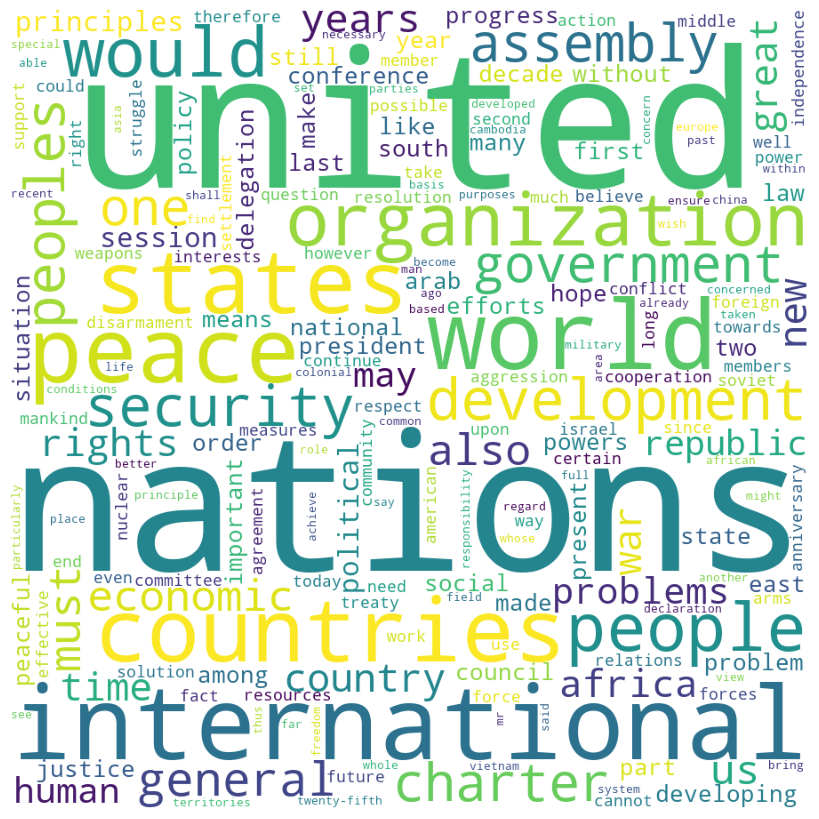

In [69]:
#importing wordcloud
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 900, height=900, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


 # TFIDF

In [70]:
#importing numpy library
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)


 # TFIDF=TF*IDF

In [71]:
#calculating TFIDF 
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()


,freq,tfidf
token,,
nations,1997,199.7
united,1996,199.6
international,1251,125.1
world,1093,109.3
peace,970,97.0


# GROUPING BY YEAR

GROUPING THE DATA ACCORDING TO FREQUENCY MATRIX

In [72]:
#Counting occurrences of keywords within tokens in a DataFrame grouped by a specific column.
def count_keywords_by(df, by, keywords, column='tokens'):
    
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    return freq_df.groupby(by=by).sum().sort_values(by)


 # WORDCLOUD

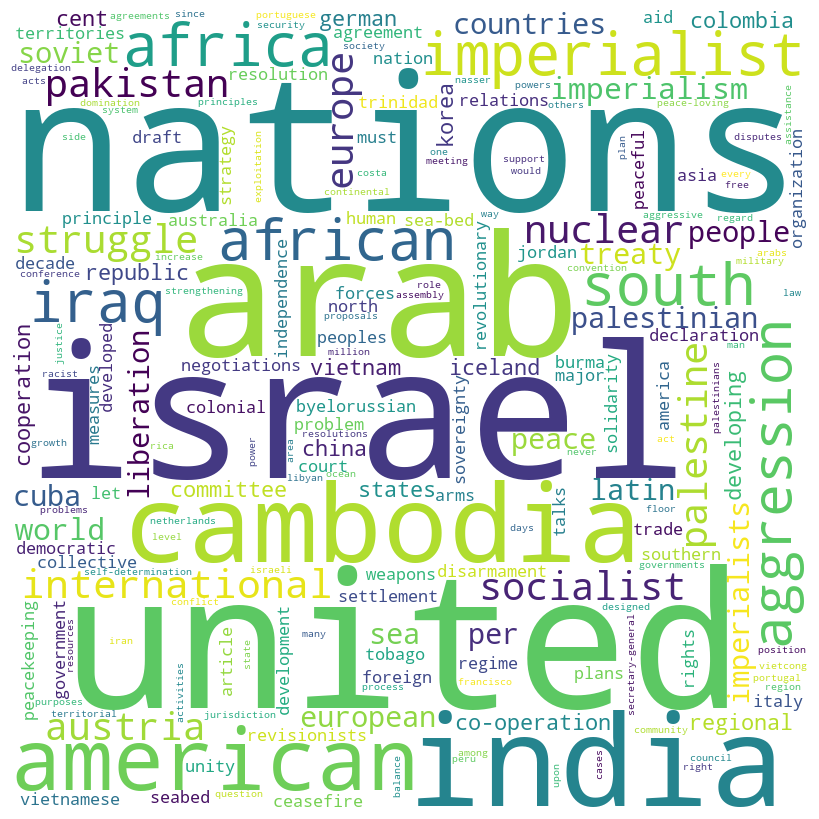

In [73]:
# Create a WordCloud object with specified parameters
wc = WordCloud(background_color='white', width = 800, height=800, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
# Set up the figure for plotting
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


# PLOTTING

PLOTTING THE FREQUENCY OF COUNTRIES WITH YEAR

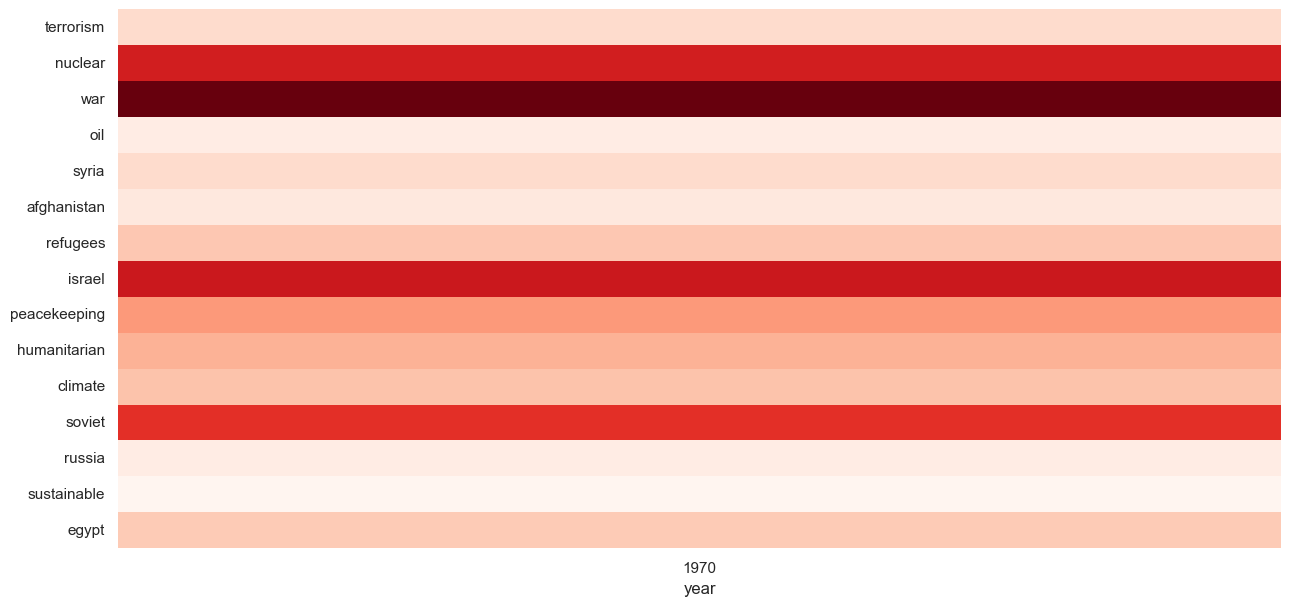

In [74]:
#importing seaborn 
import seaborn as sns
keywords = ['terrorism', 'nuclear', 'war', 'oil',
            'syria', 'afghanistan', 'refugees', 'israel', 'peacekeeping', 
            'humanitarian', 'climate', 'soviet','russia', 'sustainable','egypt']  
freq_df = count_keywords_by(df, by='year', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
# Create a heatmap using seaborn
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)


 IMPORTING NLTK PACKAGE AND GETTING STOPWORDS

In [75]:
import nltk 
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)


{'out', 't', 'won', 'wouldn', 'or', 've', 'all', 'than', 'after', 'd', 'he', 'does', 'just', 'myself', 'above', "you'd", 'at', 'once', 'i', 'being', 'more', 'her', 'not', 'couldn', 'each', "you're", "couldn't", 'me', 'theirs', "mustn't", 'been', 'ma', 'she', 'ours', 'before', "shouldn't", "hadn't", 'my', 'most', 're', "doesn't", "needn't", 'themselves', "aren't", 'should', 'were', 'are', 'very', "hasn't", 'down', 'did', 'didn', 'against', 'ain', 'why', 'their', 's', 'do', 'shan', "haven't", 'nor', 'you', 'herself', 'when', 'those', 'then', 'off', 'can', 'weren', 'other', 'this', 'shouldn', "she's", 'about', "don't", 'don', 'now', 'which', 'own', 'wasn', 'your', 'whom', 'for', 'who', 'them', 'no', 'what', 'up', 'between', 'hers', 'because', "it's", 'how', 'am', 'has', 'doing', 'with', 'its', "should've", 'from', 'is', 'm', 'the', 'and', 'same', "wasn't", "isn't", 'only', 'doesn', 'they', 'these', 'further', 'having', 'ourselves', 'a', "wouldn't", 'to', "weren't", 'we', "that'll", 'into'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laxmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
